# Anomaly detection - Exercise

1) With this information and no more, formulate the problem, and tell him what is feasible and what is not.

2) Develop an approach to answer his question in the best way possible.

3) Present your findings to the expert, in a way he can understand and help you validate your results...

<div class = "alert alert-info">

Nous avons ici un jeu de données contaminé : des données dans le jeu de données sont des anomalies et nous n'avons pas apriori de labels sur les données. Il s'agit donc d'un problème d'outlier detection où nous cherchons à détecter quelles données sont rares et différentes des autres.

</div>

## I. Code de détection d'anomalies

### 1. Import et chargement des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# from sklearn.decomposition import pca
%matplotlib inline

In [5]:
path = os.getcwd()
data_path = path + "/data/dataset.csv"
data=pd.read_csv("./data/dataset.csv",sep=',')
data.head(10)

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.808270,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.807840,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.807840,-1.017575,-0.664906,3.049237,0.118828,-1.270237
5,1_1_1,-0.906958,-1.126579,-1.302869,-1.419230,-1.257124,-0.849991,-1.027477,-0.738178,3.023786,-0.082348,-1.344057
6,1_1_1,-1.006352,-1.187354,-1.350847,-1.435916,-1.253672,-0.916288,-1.077492,-0.826521,2.851686,-0.313660,-1.393121
7,1_1_1,-1.097180,-1.334190,-1.466725,-1.489243,-1.247630,-1.045137,-1.187412,-0.987181,2.773930,-0.434989,-1.605991
8,1_1_1,-1.274279,-1.465656,-1.567697,-1.576831,-1.247630,-1.199595,-1.323505,-1.116913,2.676436,-0.573744,-1.696111
9,1_1_1,-1.396218,-1.607071,-1.574293,-1.639604,-1.279334,-1.319324,-1.444373,-1.171858,2.675144,-0.578730,-1.697076


Text(0.5, 1.0, 'p10')

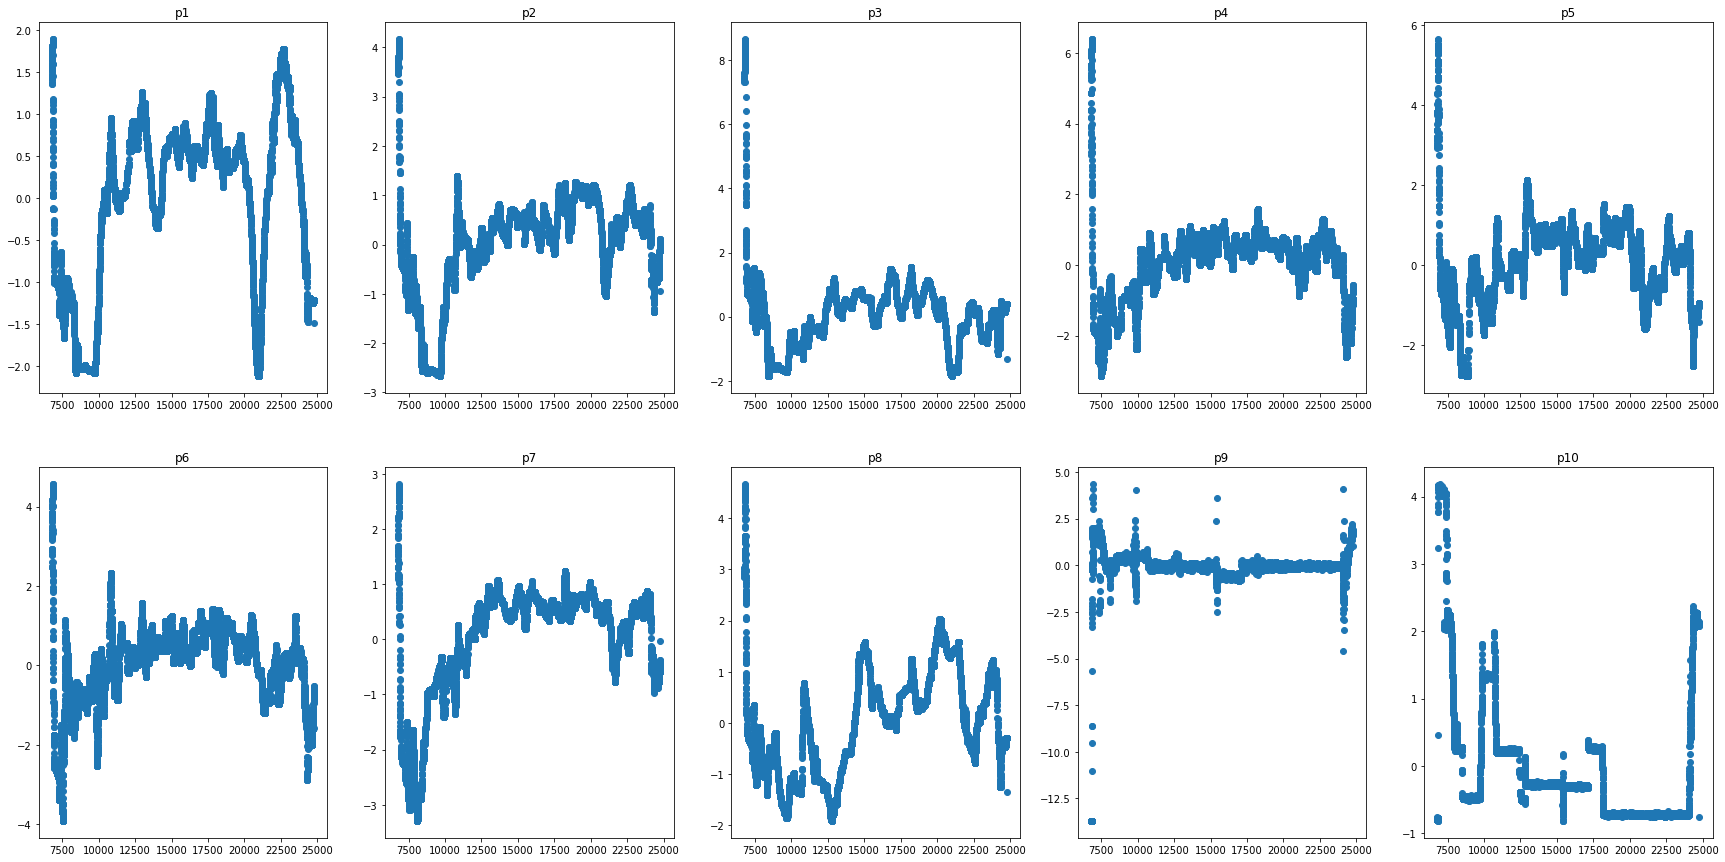

In [3]:
start = 6777
nb_points = 24779-6777
t = range(start,start+nb_points)

fig,ax = plt.subplots(2,5,figsize=(30,15))

p1 = data['p1'][start:start+nb_points]
ax[0][0].plot(t,p1,'o')
ax[0][0].set_title('p1')
p2 = data['p2'][start:start+nb_points]
ax[0][1].plot(t,p2,'o')
ax[0][1].set_title('p2')
p3 = data['p3'][start:start+nb_points]
ax[0][2].plot(t,p3,'o')
ax[0][2].set_title('p3')
p4 = data['p4'][start:start+nb_points]
ax[0][3].plot(t,p4,'o')
ax[0][3].set_title('p4')
p5 = data['p5'][start:start+nb_points]
ax[0][4].plot(t,p5,'o')
ax[0][4].set_title('p5')
p6 = data['p6'][start:start+nb_points]
ax[1][0].plot(t,p6,'o')
ax[1][0].set_title('p6')
p7 = data['p7'][start:start+nb_points]
ax[1][1].plot(t,p7,'o')
ax[1][1].set_title('p7')
p8 = data['p8'][start:start+nb_points]
ax[1][2].plot(t,p8,'o')
ax[1][2].set_title('p8')
p9 = data['p9'][start:start+nb_points]
ax[1][3].plot(t,p9,'o')
ax[1][3].set_title('p9')
p10 = data['p10'][start:start+nb_points]
ax[1][4].plot(t,p10,'o')
ax[1][4].set_title('p10')

In [29]:
# from sklearn.decomposition import PCA

# flight_pca = PCA()
# flight_pca.fit(X)

Des vols sont difficilement comparables les uns avec les autres, étant de distance parcourue, de durée différentes. Nous pouvons néanmoins essayer de distinguer différentes phases de vol et labelliser les données pour comparer les atterrissages avec les atterrissages, les décollages avec les décollages, etc. 

Essayons donc de labelliser chaque point, pour en distinguer 6 phases de vol. En utilisant la méthode des K-means.

In [18]:
vector_data = data.filter(['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11'], axis=1)
# vector_data.head()
# vector_data.values.tolist()

vector_data.head()

X = vector_data.to_numpy()
print(numpy_array)

[[-0.805191 -1.141993 -1.328327 ...  2.807146  0.495528 -1.246737]
 [-0.805191 -1.134902 -1.320393 ...  2.894177  0.494467 -1.244472]
 [-0.805191 -1.117304 -1.307167 ...  2.981904  0.42937  -1.244472]
 ...
 [ 0.147741  0.060913  0.185874 ... -1.663704  0.614371  0.432218]
 [ 0.147741  0.060913  0.185874 ... -1.663704  0.614371  0.432218]
 [ 0.196873  0.090617  0.292064 ... -1.663704  0.614371  0.462288]]


In [39]:
from sklearn.cluster import KMeans

flight_kmeans = KMeans(n_clusters=6)
flight_kmeans.fit(X)

y_pred = flight_kmeans.predict(X)
print(y_pred)

data['flight_phase'] = y_pred
data.head(20)

[1 1 1 ... 5 5 5]


,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,flight_phase
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.808270,-1.070547,-0.504352,2.807146,0.495528,-1.246737,1
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.894177,0.494467,-1.244472,1
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.981904,0.429370,-1.244472,1
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.807840,-1.045557,-0.516000,3.063298,0.348056,-1.244472,1
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.807840,-1.017575,-0.664906,3.049237,0.118828,-1.270237,1
5,1_1_1,-0.906958,-1.126579,-1.302869,-1.419230,-1.257124,-0.849991,-1.027477,-0.738178,3.023786,-0.082348,-1.344057,1
6,1_1_1,-1.006352,-1.187354,-1.350847,-1.435916,-1.253672,-0.916288,-1.077492,-0.826521,2.851686,-0.313660,-1.393121,1
7,1_1_1,-1.097180,-1.334190,-1.466725,-1.489243,-1.247630,-1.045137,-1.187412,-0.987181,2.773930,-0.434989,-1.605991,1
8,1_1_1,-1.274279,-1.465656,-1.567697,-1.576831,-1.247630,-1.199595,-1.323505,-1.116913,2.676436,-0.573744,-1.696111,1
9,1_1_1,-1.396218,-1.607071,-1.574293,-1.639604,-1.279334,-1.319324,-1.444373,-1.171858,2.675144,-0.578730,-1.697076,1


Text(0.5, 1.0, 'p10')

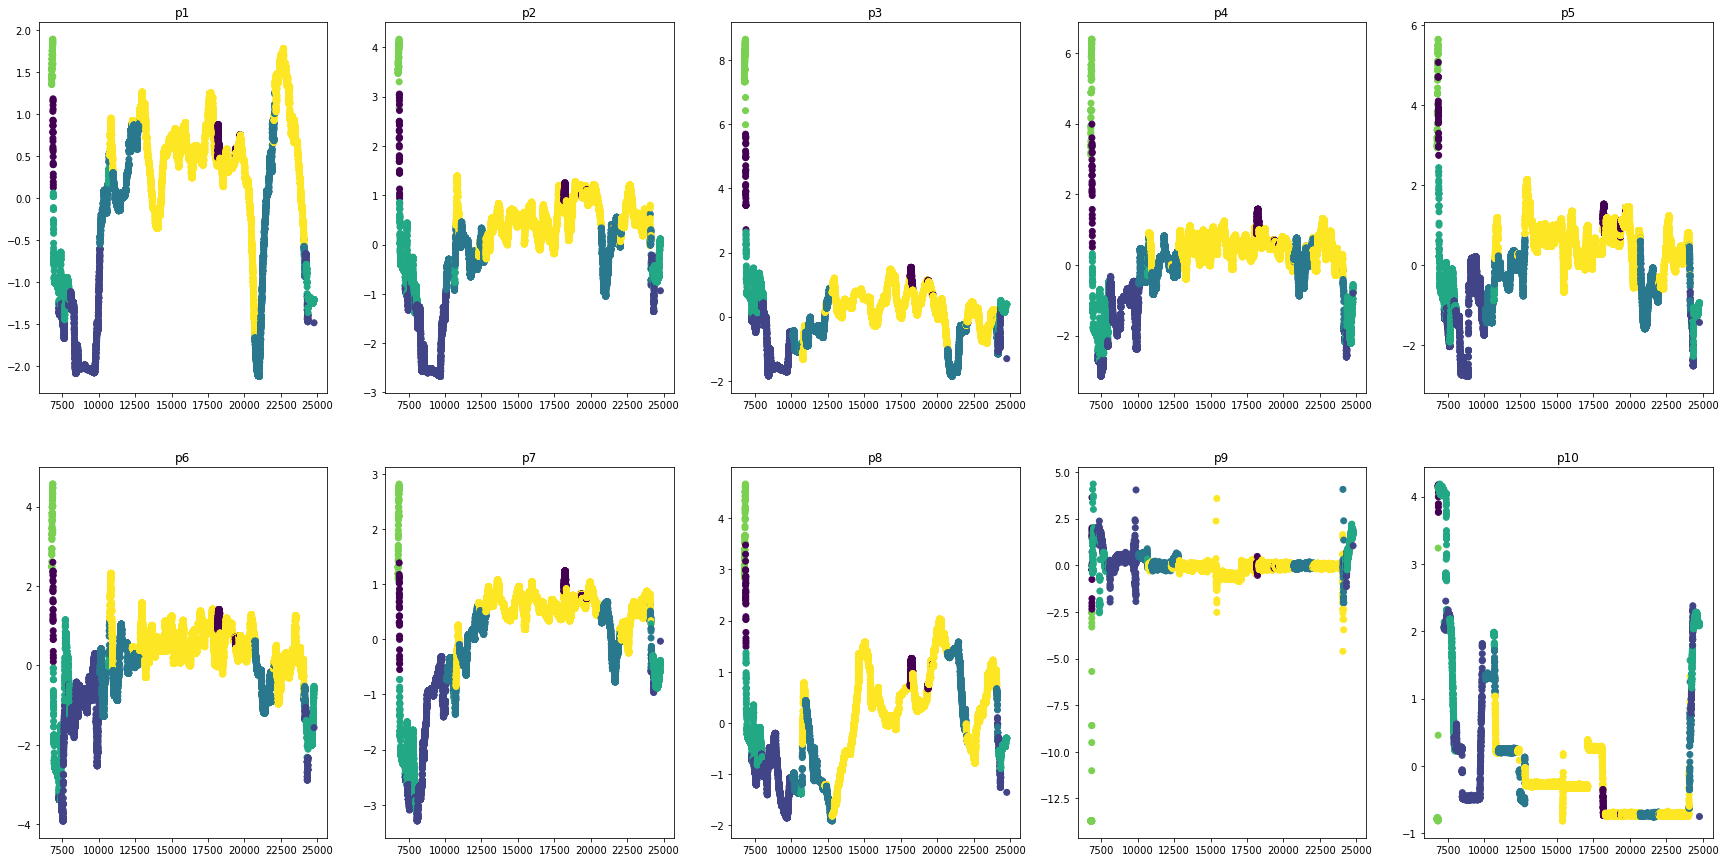

In [40]:
start = 6777
nb_points = 24779-6777
t = range(start,start+nb_points)

fig,ax = plt.subplots(2,5,figsize=(30,15))

p1 = data['p1'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[0][0].scatter(t,p1, c=color)
ax[0][0].set_title('p1')
p2 = data['p2'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[0][1].scatter(t,p2, c=color)
ax[0][1].set_title('p2')
p3 = data['p3'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[0][2].scatter(t,p3, c=color)
ax[0][2].set_title('p3')
p4 = data['p4'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[0][3].scatter(t,p4, c=color)
ax[0][3].set_title('p4')
p5 = data['p5'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[0][4].scatter(t,p5, c=color)
ax[0][4].set_title('p5')
p6 = data['p6'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[1][0].scatter(t,p6, c=color)
ax[1][0].set_title('p6')
p7 = data['p7'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[1][1].scatter(t,p7, c=color)
ax[1][1].set_title('p7')
p8 = data['p8'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[1][2].scatter(t,p8, c=color)
ax[1][2].set_title('p8')
p9 = data['p9'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[1][3].scatter(t,p9, c=color)
ax[1][3].set_title('p9')
p10 = data['p10'][start:start+nb_points]
color = y_pred[start:start+nb_points]
ax[1][4].scatter(t,p10, c=color)
ax[1][4].set_title('p10')

## II. Présentation à l'expert

- des phases de vol comparables? -> variable supplémentaire : position relative dans le liste comme paramètre?
- comment détecter une fenêtre comme outlier? -> attention éliminer un point = éliminer les 100 enregistrements d'une fenêtre
- ajouter la variable secondes
- delta au point avant/après -> si très différent au point avant/après -> outlier?

In [ ]:
fabrice.jimenez@airbus.com